# Решение задачи "Титаник - Машинное обучение после катастрофы"
    Набор данных содержит 1309.
    Набор данных обладает 11 параметрами:
    1)Survival-Выживание
    2)Pclass-Класс билетов
    3)Sex-Пол
    4)Age-Возраст в годах
    5)Sibsp-Количество братьев и сестер / супругов на борту Титаника
    6)Parch-Количество родителей / детей на борту Титаника
    7)Ticket-Номер билета
    8)Fare-Стоимость проезда для пассажиров
    9)Cabin-Номер каюты
    10)Embarked-Порт посадки
    11)Name-Имя
    12)PassengerId-Пассажир по счёту

# Считывание данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
gender_submission = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# EDA

In [6]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

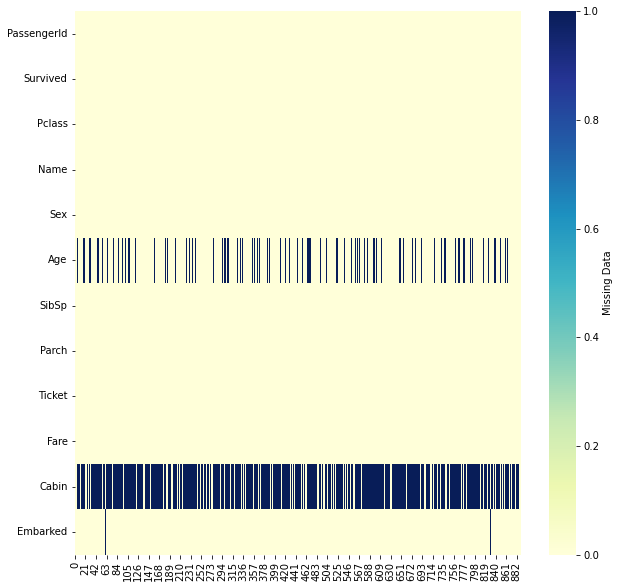

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
a=train[(train["Survived"]==1)]["Sex"]
a.describe()

count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object

In [14]:
train.loc[:,train.dtypes=="object"]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


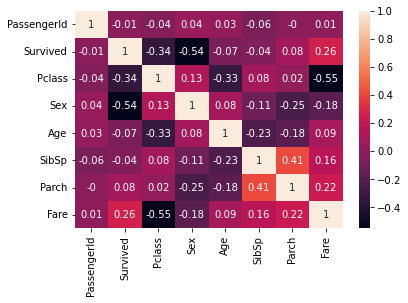

<Figure size 432x288 with 0 Axes>

In [44]:
matrix = train.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
plt.savefig("correlation_matrix_Python.png", dpi=100)

In [15]:
train = train.drop(columns=["Name","Embarked","Cabin","Ticket"])
test=test.drop(columns=["Name","Embarked","Cabin","Ticket"])

In [16]:
train.loc[:,train.dtypes=="object"]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [17]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train['Sex'])

train['Sex'] = label_encoder.transform(train['Sex'])
test['Sex'] = label_encoder.transform(test['Sex'])

In [19]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [20]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [21]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

# Заполнение пропусков

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [23]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
test["Age"].fillna(test["Age"].mean(),inplace=True)
test["Fare"].fillna(test["Fare"].mean(),inplace=True)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# Анализ выбросов

<AxesSubplot:>

<Figure size 360x360 with 0 Axes>

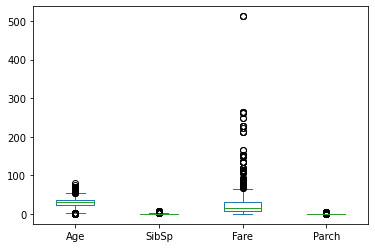

In [24]:
plt.figure(figsize=(5,5))

train[['Age', 'SibSp', 'Fare', 'Parch']].plot(kind='box')

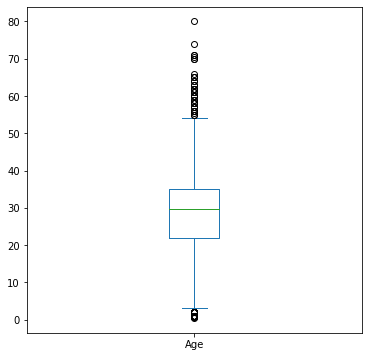

In [25]:
_, bp = train.Age.plot.box(return_type='both', figsize=(6,6))

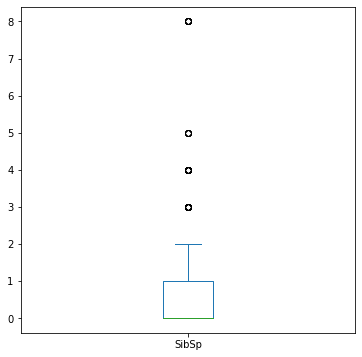

In [26]:
_, bp = train.SibSp.plot.box(return_type='both', figsize=(6,6))

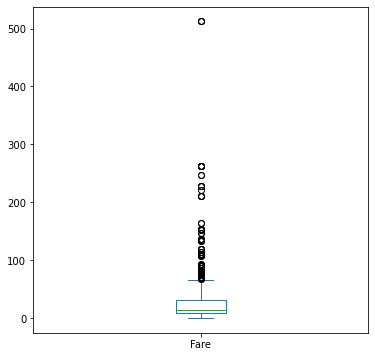

In [27]:
_, bp = train.Fare.plot.box(return_type='both', figsize=(6,6))

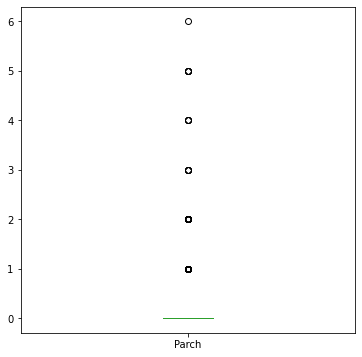

In [28]:
_, bp = train.Parch.plot.box(return_type='both', figsize=(6,6))

In [29]:
outliers_Age = [flier.get_ydata() for flier in bp["fliers"]][0]
train[train.Age.isin(outliers_Age)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
7,8,0,3,1,2.0,3,1,21.0750
10,11,1,3,0,4.0,1,1,16.7000
16,17,0,3,1,2.0,4,1,29.1250
43,44,1,2,0,3.0,1,2,41.5792
58,59,1,2,0,5.0,1,2,27.7500
63,64,0,3,1,4.0,3,2,27.9000
119,120,0,3,0,2.0,4,2,31.2750
164,165,0,3,1,1.0,4,1,39.6875
171,172,0,3,1,4.0,4,1,29.1250
172,173,1,3,0,1.0,1,1,11.1333


In [30]:
outliers_SibSp = [flier.get_ydata() for flier in bp["fliers"]][0]
train[train.SibSp.isin(outliers_SibSp)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
3,4,1,1,0,35.000000,1,0,53.1000
7,8,0,3,1,2.000000,3,1,21.0750
9,10,1,2,0,14.000000,1,0,30.0708
...,...,...,...,...,...,...,...,...
866,867,1,2,0,27.000000,1,0,13.8583
869,870,1,3,1,4.000000,1,1,11.1333
871,872,1,1,0,47.000000,1,1,52.5542
874,875,1,2,0,28.000000,1,0,24.0000


In [31]:
outliers_Fare = [flier.get_ydata() for flier in bp["fliers"]][0]
train[train.Fare.isin(outliers_Fare)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
872,873,0,1,1,33.0,0,0,5.0


In [32]:
outliers_Parch = [flier.get_ydata() for flier in bp["fliers"]][0]
train[train.Parch.isin(outliers_Parch)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
7,8,0,3,1,2.000000,3,1,21.0750
8,9,1,3,0,27.000000,0,2,11.1333
10,11,1,3,0,4.000000,1,1,16.7000
13,14,0,3,1,39.000000,1,5,31.2750
16,17,0,3,1,2.000000,4,1,29.1250
...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.000000,1,1,52.5542
879,880,1,1,0,56.000000,0,1,83.1583
880,881,1,2,0,25.000000,0,1,26.0000
885,886,0,3,0,39.000000,0,5,29.1250


In [33]:
Q1 =  train.Age.quantile(0.25)
Q3 = train.Age.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(IQR)
print(Q3)

emissions_age = train[(train.Age < Q1-1.5*IQR ) | (train.Age > Q3+1.5*IQR)]

mean = emissions_age["Age"].mean()
train['Age'].fillna(mean, inplace=True)

22.0
13.0
35.0


In [34]:
Q1 =  train.SibSp.quantile(0.25)
Q3 = train.SibSp.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(IQR)
print(Q3)

emissions_sibsp = train[(train.SibSp < Q1-1.5*IQR ) | (train.SibSp > Q3+1.5*IQR)]

mean = emissions_age["SibSp"].mean()
train['SibSp'].fillna(mean, inplace=True)

0.0
1.0
1.0


In [35]:
Q1 =  train.Fare.quantile(0.25)
Q3 = train.Fare.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(IQR)
print(Q3)

emissions_fare = train[(train.Fare < Q1-1.5*IQR ) | (train.Fare > Q3+1.5*IQR)]

mean = emissions_age["Fare"].mean()
train['Fare'].fillna(mean, inplace=True)

7.9104
23.0896
31.0


In [36]:
Q1 =  train.Parch.quantile(0.25)
Q3 = train.Parch.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(IQR)
print(Q3)

emissions_parch = train[(train.Parch < Q1-1.5*IQR ) | (train.Parch > Q3+1.5*IQR)]

mean = emissions_age["Parch"].mean()
train['Parch'].fillna(mean, inplace=True)

0.0
0.0
0.0


C:\Users\Msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Msi\anaconda3\lib\site-packa

<AxesSubplot:xlabel='Parch'>

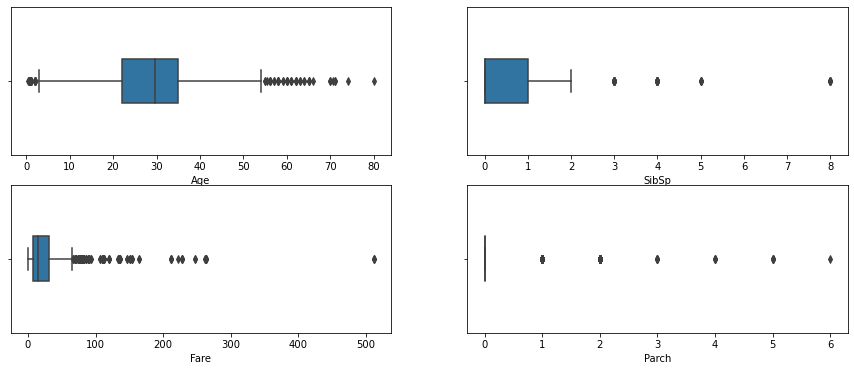

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))  

sns.boxplot(train['Age'], ax=axes[0, 0], width=0.3)
sns.boxplot(train['SibSp'], ax=axes[0, 1], width=0.3)
sns.boxplot(train['Fare'], ax=axes[1,0], width=0.3)
sns.boxplot(train['Parch'], ax=axes[1, 1], width=0.3)

# Балансировка данных

In [38]:
X = train.drop(columns=['Survived'])
y = train['Survived']

y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 1, k_neighbors = 1)

column = X.columns

X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data = X_os, columns = column)
y_os = pd.DataFrame(data = y_os, columns = ['Survived'])

print(X_os.shape, y_os.shape)
y_os.value_counts()

(1098, 7) (1098, 1)


Survived
0           549
1           549
dtype: int64

In [40]:
X_os.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


# Обучение модели

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, random_state = 123, test_size = 0.4) 
print(X_train.shape, X_test.shape)

(658, 7) (440, 7)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
answers_pred = model.predict(X_test)

print(accuracy_score(y_test, answers_pred))

0.8409090909090909


C:\Users\Msi\AppData\Local\Temp\ipykernel_10360\948857800.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


In [43]:
y_pred_test = model.predict(test)

y_pred_test = pd.DataFrame(data = y_pred_test, columns=['Survived'])

y_pred_test = y_pred_test.reset_index(drop= True)

y_pred_test.insert (loc= len(y_pred_test.columns) , column='PassengerId', value=test["PassengerId"])

y_pred_test.to_csv('solution.csv', index = False)